In [4]:
import geopandas as gpd
import pandas as pd
import os
from shapely.geometry import MultiPoint
import contextily
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm

In [5]:
data_dir = os.path.join(os.getcwd(), "..", "..", "preprocessing", "nyc_bike", "data")

In [6]:
"""
data_loaded = load_dataset("kraina/nyc_bike", name="nyc_bike_2013")
df_2013 = data_loaded["train"].to_pandas()
"""

'\ndata_loaded = load_dataset("kraina/nyc_bike", name="nyc_bike_2013")\ndf_2013 = data_loaded["train"].to_pandas()\n'

# Postprocessing of years 2013-2020 and then 2021-2023

In [7]:
save_files_gdf = (
    False  # change it if you want to save GeoDataFrame in your data directory
)

In [8]:
years_previous = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
years_current = [2021, 2022, 2023]

In [9]:
def make_geodataframe_previous(dataframe: pd.DataFrame) -> gpd.GeoDataFrame:
    start_station_geometry = gpd.points_from_xy(
        x=dataframe["start station longitude"], y=dataframe["start station latitude"]
    )
    end_station_geometry = gpd.points_from_xy(
        x=dataframe["end station longitude"], y=dataframe["end station latitude"]
    )
    multi_point_stations_geometries = [
        MultiPoint([start, end])
        for start, end in zip(start_station_geometry, end_station_geometry)
    ]
    gdf = gpd.GeoDataFrame(
        dataframe.drop(
            [
                "start station latitude",
                "start station longitude",
                "end station latitude",
                "end station longitude",
            ],
            axis=1,
        ),
        geometry=multi_point_stations_geometries,
        crs="EPSG:4326",
    )

    return gdf

In [10]:
def make_geodataframe_current(dataframe: pd.DataFrame) -> gpd.GeoDataFrame:
    start_station_geometry = gpd.points_from_xy(
        x=dataframe["start_lng"], y=dataframe["start_lat"]
    )
    end_station_geometry = gpd.points_from_xy(
        x=dataframe["end_lng"], y=dataframe["end_lat"]
    )
    multi_point_stations_geometries = [
        MultiPoint([start, end])
        for start, end in zip(start_station_geometry, end_station_geometry)
    ]
    gdf = gpd.GeoDataFrame(
        dataframe.drop(
            [
                "start_lng",
                "start_lat",
                "end_lng",
                "end_lat",
            ],
            axis=1,
        ),
        geometry=multi_point_stations_geometries,
        crs="EPSG:4326",
    )

    return gdf

In [11]:
# local version
nyc_bikes_files_previous = [
    os.path.join(data_dir, str(file))
    for file in os.listdir(data_dir)
    if (
        "nyc_bike_" in file
        and file.endswith(".parquet")
        and file[9:13] in [str(year) for year in years_previous]
    )
]
nyc_bikes_files_current = [
    os.path.join(data_dir, str(file))
    for file in os.listdir(data_dir)
    if (
        "nyc_bike_" in file
        and file.endswith(".parquet")
        and file[9:13] in [str(year) for year in years_current]
    )
]

In [12]:
for file in tqdm(
    nyc_bikes_files_previous,
    desc="Geodataframe transforming",
    colour="green",
):
    gdf = make_geodataframe_previous(pd.read_parquet(file))
    if save_files_gdf:
        gdf.to_parquet(os.path.join(data_dir, f"nyc_bike_gdf_{file[-12:]}"))

Geodataframe transforming:   0%|          | 0/8 [00:00<?, ?it/s]

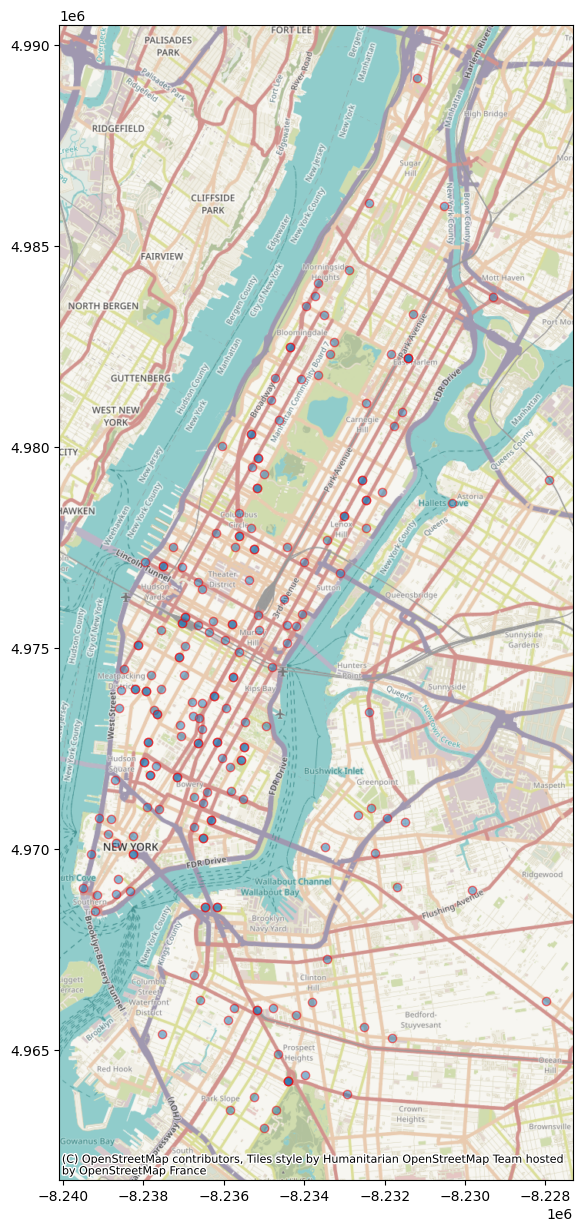

In [13]:
neigh_wm = gdf.iloc[:100].to_crs(epsg=3857)  # Change crs to web mercator
ax = neigh_wm.plot(figsize=(20, 15), alpha=0.5, edgecolor="r")
contextily.add_basemap(ax, zoom=13)
plt.show()

In [14]:
for file in tqdm(
    nyc_bikes_files_current,
    desc="Geodataframe transforming",
    colour="green",
):
    gdf = make_geodataframe_current(pd.read_parquet(file))
    if save_files_gdf:
        gdf.to_parquet(os.path.join(data_dir, f"nyc_bike_gdf_{file[-12:]}"))

Geodataframe transforming:   0%|          | 0/3 [00:00<?, ?it/s]

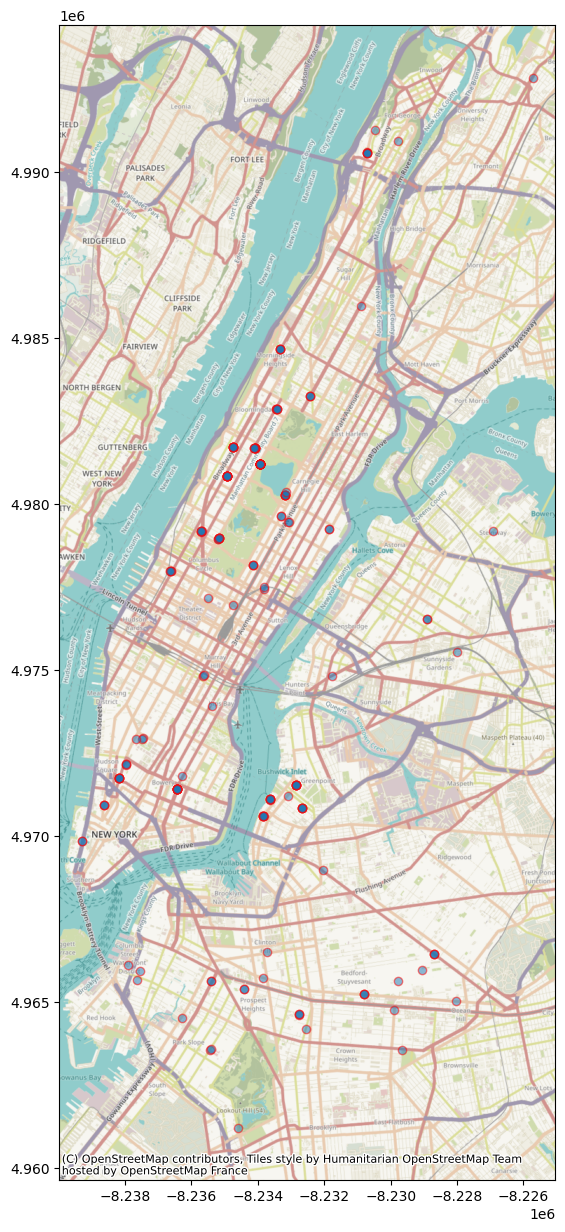

In [16]:
neigh_wm = gdf.iloc[:100].to_crs(epsg=3857)  # Change crs to web mercator
ax = neigh_wm.plot(figsize=(20, 15), alpha=0.5, edgecolor="r")
contextily.add_basemap(ax, zoom=13)
plt.show()

In [ ]:
# remote version
"""
for year in years_previous:
    data_loaded = load_dataset("kraina/nyc_bike", name=f"nyc_bike_{year}")
    df_year = data_loaded["train"].to_pandas()
"""